In [1]:
import random
import numpy as np
import tensorflow as tf
import mlflow.keras

from ml_investing_wne import config
from ml_investing_wne.utils import get_logger
from ml_investing_wne.experiment_factory import create_asset, experiment_factory

random.seed(config.seed)
np.random.seed(config.seed)
tf.random.set_seed(config.seed)

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

In [3]:
asset = create_asset()
experiment = experiment_factory(asset).get_experiment()

/Users/i0495036/Documents/sandbox/ml_investing_wne/src/ml_investing_wne/data_engineering/crypto_factory.py:217: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for day, vol in daily_volatility.iteritems():


In [4]:
experiment.df


,datetime,open,close,high,low,y_pred,SMA_3,EMA_3,VAR_3,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_13,EMA_13,VAR_13,SMA_20,EMA_20,VAR_20,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos,time_step
0,2018-01-02 11:00:00,848.26,849.1,853.97,843.18,0,844.883333,846.373778,46.110833,843.734,844.035442,41.15628,842.584,834.332341,82.075493,832.296923,827.412447,876.552973,802.8225,812.870678,2277.571736,31.630061,-1.091979,32.722040,70.701723,70.783474,70.371886,64.111988,62.959275,-33.501728,832.257934,843.734,855.210066,2.720304,0.733791,1.000707,11,1,0.136167,-0.990686,0.866025,0.5,1
1,2018-01-02 12:00:00,849.57,843.15,854.5,840.0,1,846.916667,844.761889,10.730833,842.844,843.740294,36.51493,841.105,835.935552,53.479850,839.078462,829.660669,338.517014,808.0260,815.754423,2120.817667,30.359720,-1.889856,32.249576,67.282500,66.080751,61.638353,65.046973,63.706124,-37.456793,832.034385,842.844,853.653615,2.565033,0.514154,0.992993,12,1,-0.136167,-0.990686,0.866025,0.5,1
2,2018-01-02 13:00:00,843.15,861.95,861.95,835.83,0,851.400000,853.355945,92.327500,847.950,849.810196,84.86875,844.608,840.665452,65.767596,845.017692,834.273430,97.839586,814.2725,820.154001,1967.426641,30.518174,-1.385122,31.903295,71.905686,72.495979,73.913539,68.027120,65.728694,-24.960117,831.470316,847.950,864.429684,3.886947,0.924765,1.022297,13,1,-0.398401,-0.917211,0.866025,0.5,1
3,2018-01-02 14:00:00,861.93,856.93,866.65,850.0,1,854.010000,855.142972,94.754800,851.926,852.183464,55.56563,846.902,843.622642,64.263751,845.220769,837.510083,102.455524,819.9700,823.656478,1761.521989,29.894077,-1.607375,31.501452,69.097946,68.644102,67.039834,67.288003,66.787366,-35.71908,838.591458,851.926,865.260542,3.130446,0.687633,0.994176,14,1,-0.631088,-0.775711,0.866025,0.5,1
4,2018-01-02 15:00:00,856.92,865.56,866.12,855.8,1,861.480000,860.351486,18.784900,855.338,856.642309,84.55057,849.235,847.611253,94.470917,845.806923,841.517214,123.075440,825.9365,827.647289,1547.252413,29.752872,-1.398863,31.151736,71.181285,71.533197,72.345307,66.060470,67.125198,-41.139394,838.889236,855.338,871.786764,3.846144,0.810722,1.010071,15,1,-0.816970,-0.576680,0.866025,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44502,2023-01-30 17:00:00,1583.12,1581.24,1588.54,1579.84,0,1583.176667,1583.081981,3.884233,1584.640,1584.708432,51.79745,1587.556,1591.566944,160.059338,1597.563846,1595.545750,484.947859,1612.5300,1601.595660,749.697989,-9.679114,-4.666664,-5.012450,36.337820,33.241675,31.904876,21.029538,23.942375,-81.598589,1571.765535,1584.640,1597.514465,1.624907,0.367956,0.998819,17,0,-0.997669,-0.068242,0.000000,1.0,2
44503,2023-01-30 18:00:00,1581.24,1578.2,1583.93,1573.93,0,1580.850000,1580.640990,6.141100,1584.828,1582.538955,48.50557,1583.383,1589.136590,33.983735,1593.127692,1593.067786,372.594869,1609.2890,1599.367502,751.741525,-10.246905,-4.187564,-6.059341,35.070137,31.610616,29.170016,18.192675,22.037089,-84.762457,1572.369355,1584.828,1597.286645,1.572239,0.234,0.998077,18,0,-0.979084,0.203456,0.000000,1.0,1
44504,2023-01-30 19:00:00,1578.2,1554.24,1578.39,1535.0,0,1571.226667,1567.440495,218.720533,1576.394,1573.105970,159.96088,1580.028,1582.791756,113.687351,1587.342308,1587.520959,352.413519,1604.7650,1595.069644,823.620742,-12.486321,-5.141584,-7.344737,27.058042,22.110084,16.109594,17.517874,18.913362,-81.085332,1553.769349,1576.394,1599.018651,2.870431,0.010401,0.984818,19,0,-0.887885,0.460065,0.000000,1.0,1
44505,2023-01-30 20:00:00,1554.25,1553.16,1554.62,1536.84,1,1561.866667,1560.300248,200.374933,1569.990,1566.457313,224.35310,1576.775,1577.404164,178.577472,1581.627692,1582.612251,280.352219,1600.1190,1591.078250,851.222873,-14.184709,-5.471977,-8.712731,26.761260,21

In [5]:
config.currency = 'BTCUSDT'
btc = create_asset()
experiment_btc = experiment_factory(btc).get_experiment()

/Users/i0495036/Documents/sandbox/ml_investing_wne/src/ml_investing_wne/data_engineering/crypto_factory.py:217: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for day, vol in daily_volatility.iteritems():


In [6]:
config.currency = 'ETHUSDT'
eth = create_asset()
experiment_eth = experiment_factory(eth).get_experiment()

/Users/i0495036/Documents/sandbox/ml_investing_wne/src/ml_investing_wne/data_engineering/crypto_factory.py:217: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for day, vol in daily_volatility.iteritems():


In [7]:
config.currency = 'SOLUSDT'
sol = create_asset()
experiment_sol = experiment_factory(sol).get_experiment()
experiment_sol.df.head(1)


/Users/i0495036/Documents/sandbox/ml_investing_wne/src/ml_investing_wne/data_engineering/crypto_factory.py:217: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for day, vol in daily_volatility.iteritems():


,datetime,open,close,high,low,y_pred,SMA_3,EMA_3,VAR_3,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_13,EMA_13,VAR_13,SMA_20,EMA_20,VAR_20,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos,time_step
0,2020-08-12 17:00:00,3.7453,3.7446,3.7678,3.6505,1,3.756433,3.752882,0.000135,3.76486,3.74397,0.000729,3.72061,3.676262,0.013998,3.619662,3.63034,0.048182,3.478895,3.537106,0.070803,0.184331,0.011485,0.172846,64.181127,64.049808,62.266312,78.681031,80.644813,-23.135827,3.716573,3.76486,3.813147,2.565128,0.290212,0.996726,17,2,-0.997669,-0.068242,0.866025,-0.5,1


In [8]:
config.currency = 'LTCUSDT'
ltc = create_asset()
experiment_ltc = experiment_factory(ltc).get_experiment()
experiment_ltc.df.head(1)

/Users/i0495036/Documents/sandbox/ml_investing_wne/src/ml_investing_wne/data_engineering/crypto_factory.py:217: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for day, vol in daily_volatility.iteritems():


,datetime,open,close,high,low,y_pred,SMA_3,EMA_3,VAR_3,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_13,EMA_13,VAR_13,SMA_20,EMA_20,VAR_20,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos,time_step
0,2018-01-02 11:00:00,239.91,240.0,240.87,238.44,1,239.603333,239.624705,0.353233,239.408,239.106959,0.63977,238.743,237.200701,12.597112,236.613846,235.975238,33.916892,231.319,233.614504,78.105357,5.269244,0.056119,5.213125,63.117688,63.526171,64.2934,63.231076,63.35646,-36.899334,237.977174,239.408,240.838826,1.195304,0.706873,1.000459,11,1,0.136167,-0.990686,0.866025,0.5,1


In [9]:
config.currency = 'MATICUSDT'
matic = create_asset()
experiment_matic = experiment_factory(matic).get_experiment()
experiment_matic.df.head(1)

/Users/i0495036/Documents/sandbox/ml_investing_wne/src/ml_investing_wne/data_engineering/crypto_factory.py:217: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for day, vol in daily_volatility.iteritems():


,datetime,open,close,high,low,y_pred,SMA_3,EMA_3,VAR_3,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_13,EMA_13,VAR_13,SMA_20,EMA_20,VAR_20,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos,time_step
0,2019-05-02 11:00:00,0.00436,0.00431,0.00437,0.00429,0,0.00433,0.004341,3.000000e-10,0.004386,0.004361,6.230000e-09,0.004387,0.004361,1.131222e-08,0.004361,0.00435,1.124103e-08,0.004304,0.004326,1.385684e-08,0.00005,-0.000004,0.000054,49.517773,47.741361,40.831292,37.394412,46.577864,-68.518519,0.004245,0.004386,0.004527,6.438436,0.230868,0.993088,11,3,0.136167,-0.990686,1.224647e-16,-1.0,1


In [10]:
experiment_btc.train_test_val_split()

In [11]:
experiment_eth.train_test_val_split()

In [12]:
experiment_sol.train_test_val_split()

In [13]:
experiment_ltc.train_test_val_split()

In [14]:
experiment_matic.train_test_val_split()

In [15]:
experiment_btc.X = np.concatenate([experiment_btc.X, experiment_sol.X, experiment_ltc.X,  experiment_eth.X, experiment_matic.X])
experiment_btc.X_val = np.concatenate([experiment_btc.X_val, experiment_sol.X_val, experiment_ltc.X_val, experiment_eth.X_val, experiment_matic.X_val])
experiment_btc.X_test = np.concatenate([experiment_btc.X_test, experiment_sol.X_test, experiment_ltc.X_test, experiment_eth.X_test, experiment_matic.X_test])

experiment_btc.y_cat = np.concatenate([experiment_btc.y_cat, experiment_sol.y_cat, experiment_ltc.y_cat,  experiment_eth.y_cat,  experiment_matic.y_cat])
experiment_btc.y_val_cat = np.concatenate([experiment_btc.y_val_cat, experiment_sol.y_val_cat, experiment_ltc.y_val_cat, experiment_eth.y_val_cat, experiment_matic.y_val_cat])
experiment_btc.y_test_cat = np.concatenate([experiment_btc.y_test_cat, experiment_sol.y_test_cat, experiment_ltc.y_test_cat, experiment_eth.y_test_cat, experiment_matic.y_test_cat])

experiment_btc.y_test = np.concatenate([experiment_btc.y_test, experiment_sol.y_test, experiment_ltc.y_test, experiment_eth.y_test, experiment_matic.y_test])


In [16]:
experiment_btc.X.shape

(71264, 96, 40)

In [17]:
experiment_btc.train_model()

2023/05/28 16:39:15 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023/05/28 16:39:15 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '634f0fbe76b341339511df28cf33e0c9', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/100


2023-05-28 16:39:17.929617: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz



Epoch 1: val_accuracy improved from -inf to 0.52820, saving model to /Users/i0495036/Documents/sandbox/ml_investing_wne/src/ml_investing_wne/models/transformer_learnable_encoding_Binance_MATICUSDT_60min_1.h5
1114/1114 - 318s - loss: 0.6978 - accuracy: 0.5327 - val_loss: 0.6915 - val_accuracy: 0.5282 - 318s/epoch - 286ms/step
Epoch 2/100

Epoch 2: val_accuracy did not improve from 0.52820
1114/1114 - 313s - loss: 0.6884 - accuracy: 0.5436 - val_loss: 0.6894 - val_accuracy: 0.5280 - 313s/epoch - 281ms/step
Epoch 3/100

Epoch 3: val_accuracy did not improve from 0.52820
1114/1114 - 315s - loss: 0.6868 - accuracy: 0.5430 - val_loss: 0.6882 - val_accuracy: 0.5242 - 315s/epoch - 283ms/step
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.52820
1114/1114 - 315s - loss: 0.6837 - accuracy: 0.5456 - val_loss: 0.6924 - val_accuracy: 0.5132 - 315s/epoch - 283ms/step
Epoch 5/100

Epoch 5: val_accuracy did not improve from 0.52820
1114/1114 - 316s - loss: 0.6813 - accuracy: 0.5490 - val_lo

INFO:tensorflow:Assets written to: /var/folders/9g/0tl60q4d1zbb_1ggbb19w_4c0000gp/T/tmpujra7t5q/model/data/model/assets


INFO:tensorflow:Assets written to: /var/folders/9g/0tl60q4d1zbb_1ggbb19w_4c0000gp/T/tmpujra7t5q/model/data/model/assets
2023/05/28 18:44:16 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/i0495036/Documents/sandbox/ml_investing_wne/.conda/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


INFO:tensorflow:Assets written to: /Users/i0495036/Documents/sandbox/ml_investing_wne/src/ml_investing_wne/models/production/transformer_learnable_encoding_Binance_MATICUSDT_60min_1_96/assets


INFO:tensorflow:Assets written to: /Users/i0495036/Documents/sandbox/ml_investing_wne/src/ml_investing_wne/models/production/transformer_learnable_encoding_Binance_MATICUSDT_60min_1_96/assets


In [18]:
experiment_btc.evaluate_model()

299/299 [==============================] - 5s 16ms/step


ValueError: Length of values (9555) does not match length of index (1036)

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_pred = experiment.model.predict(experiment.X_test)
y_pred_class = y_pred.argmax(axis=-1)
y_pred_class

482/482 [==============================] - 6s 13ms/step


array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
y_pred[:,1]

array([0.5223866 , 0.5370463 , 0.5560906 , ..., 0.49402493, 0.44621336,
       0.42829776], dtype=float32)

In [ ]:
precision, recall, thresholds = precision_recall_curve(experiment.y_test, y_pred[:,1])

In [ ]:
precision[9500]

0.5343420605236314

In [ ]:
thresholds[9500]

0.5075398

Text(0.5, 1.0, 'Train Precision-Recall curve')

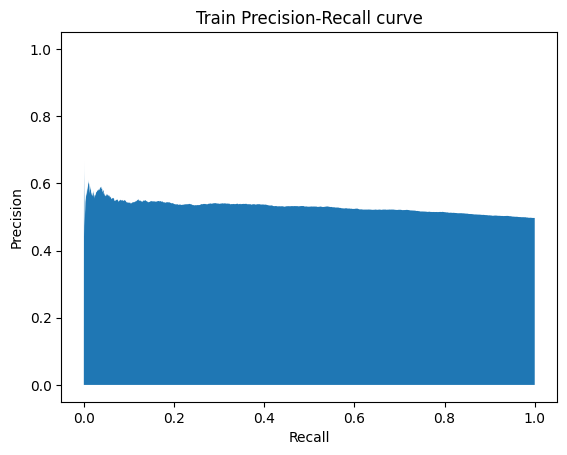

In [ ]:
import matplotlib.pyplot as plt
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve")